In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
cd '/content/drive/MyDrive/IAP_Final/PC/source'

/content/drive/MyDrive/IAP_Final/PC/source


보컬 유사도 vs 취향 유사도 Spearman 상관계수: 0.1612 (p=0.127)


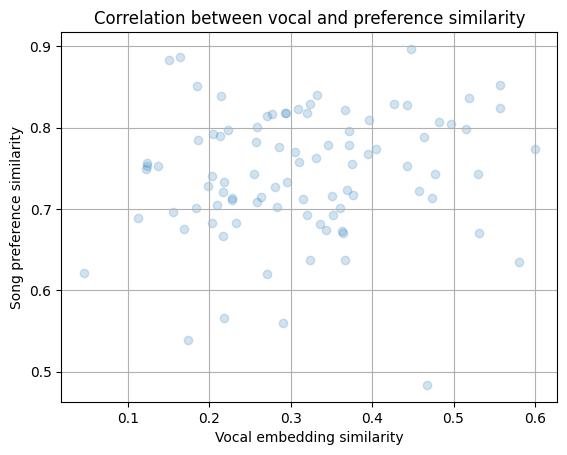

In [25]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

# 데이터 로딩
voice_npz = np.load("./vectors/ECADA_vec.npz")
keys = sorted(voice_npz.files, key=lambda x: int(x.split("(")[1].split(")")[0]))  # 사용자 번호 순 정렬
voice_embeds = np.stack([voice_npz[k] for k in keys])  # shape: (14, 192)

y = np.load("./vectors/y_vectors.npz")["y"]                           # (M, N)

y_filled = y.copy()
for i in range(y.shape[0]):
    user_row = y[i]
    mean_val = np.nanmean(user_row)
    y_filled[i] = np.where(np.isnan(user_row), mean_val, user_row)

assert voice_embeds.shape[0] == y.shape[0], "사용자 수 일치해야 함"


# 유사도 행렬 계산
voice_sim = cosine_similarity(voice_embeds)  # (M, M)
y_sim     = cosine_similarity(y_filled)             # (M, M)

# 대각선을 제외하고 벡터화 (자기 자신 비교는 제외)
def upper_triangle_flat(matrix):
    M = matrix.shape[0]
    return matrix[np.triu_indices(M, k=1)]

voice_flat = upper_triangle_flat(voice_sim)
y_flat     = upper_triangle_flat(y_sim)

# Spearman 상관계수 계산
rho, pval = spearmanr(voice_flat, y_flat)
print(f"보컬 유사도 vs 취향 유사도 Spearman 상관계수: {rho:.4f} (p={pval:.4g})")

# 시각화
plt.scatter(voice_flat, y_flat, alpha=0.2)
plt.xlabel("Vocal embedding similarity")
plt.ylabel("Song preference similarity")
plt.title("Correlation between vocal and preference similarity")
plt.grid(True)
plt.show()
